In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("UCI_Heart_Disease_Dataset_Combined.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0


In [4]:
df.shape

(2943, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease'],
      dtype='object')

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("\nDuplicate Rows except the first occurrence based on all columns are:")
print(duplicate_rows_df)


Duplicate Rows except the first occurrence based on all columns are:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
1933   34    0              1        118          210          0           1   
1949   50    0              1        120          244          0           1   
1961   46    1              0        120          249          0           0   
1973   55    1              0        140          217          0           1   
1979   66    0              2        146          278          0           0   
...   ...  ...            ...        ...          ...        ...         ...   
2938   59    1              1        140          221          0           1   
2939   60    1              0        125          258          0           0   
2940   47    1              0        110          275          0           0   
2941   50    0              0        110          254          0           0   
2942   54    1              0        120          

In [8]:
df = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(df)


DataFrame after removing duplicates:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0      40    1              1        140          289          0           0   
1      49    0              2        160          180          0           0   
2      37    1              1        130          283          0           1   
3      48    0              3        138          214          0           0   
4      54    1              2        150          195          0           0   
...   ...  ...            ...        ...          ...        ...         ...   
2641   68    0              2        120          211          0           0   
2651   44    0              2        108          141          0           1   
2657   52    1              0        128          255          0           1   
2761   59    1              3        160          273          0           0   
2796   54    1              0        120          188          0           1   

 

(array([ 968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1252.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

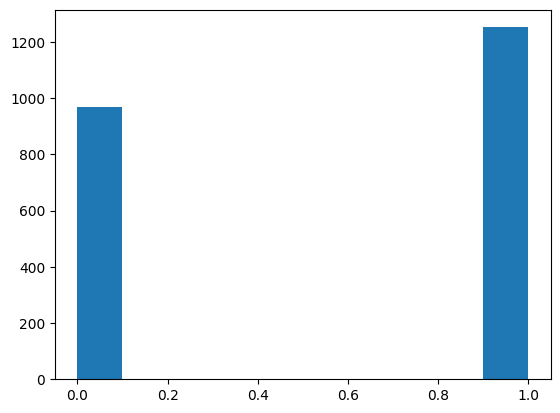

In [9]:
import matplotlib.pyplot as plt 
plt.hist(df["HeartDisease"])

In [10]:
df = pd.get_dummies(df, columns=['ChestPainType'])
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3
0,40,1,140,289,0,0,172,0,0.0,0,False,True,False,False
1,49,0,160,180,0,0,156,0,1.0,1,False,False,True,False
2,37,1,130,283,0,1,98,0,0.0,0,False,True,False,False
3,48,0,138,214,0,0,108,1,1.5,1,False,False,False,True
4,54,1,150,195,0,0,122,0,0.0,0,False,False,True,False


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'GradientBoost':GradientBoostingClassifier(),
    'ExtraTrees':ExtraTreesClassifier()
}

# Train and test each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_recall = recall_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)
    print(f'{name} test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}')
    
    val_predictions = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions)
    val_recall = recall_score(y_val, val_predictions)
    val_f1 = f1_score(y_val, val_predictions)
    print(f'{name} validation Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}')



/home/himanshu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression test Accuracy: 0.7432432432432432, Precision: 0.7605633802816901, Recall: 0.8244274809160306, F1 Score: 0.7912087912087912
Logistic Regression validation Accuracy: 0.7882882882882883, Precision: 0.8059701492537313, Recall: 0.8372093023255814, F1 Score: 0.8212927756653993
Random Forest test Accuracy: 0.8198198198198198, Precision: 0.837037037037037, Recall: 0.8625954198473282, F1 Score: 0.849624060150376
Random Forest validation Accuracy: 0.7972972972972973, Precision: 0.8333333333333334, Recall: 0.813953488372093, F1 Score: 0.8235294117647058
SVM test Accuracy: 0.6576576576576577, Precision: 0.7894736842105263, Recall: 0.5725190839694656, F1 Score: 0.6637168141592921
SVM validation Accuracy: 0.7342342342342343, Precision: 0.8645833333333334, Recall: 0.6434108527131783, F1 Score: 0.7377777777777779
XGBoost test Accuracy: 0.8063063063063063, Precision: 0.8333333333333334, Recall: 0.8396946564885496, F1 Score: 0.8365019011406843
XGBoost validation Accuracy: 0.770270270

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # adjust this according to your problem
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # adjust this according to your problem

# Define the checkpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[checkpoint_cb])

# Evaluate the model on the train set
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=2)
print('\nTrain accuracy:', train_acc)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


2024-01-12 20:35:30.218760: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-12 20:35:30.303040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-12 20:35:30.303104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-12 20:35:30.304818: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-12 20:35:30.319448: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50


2024-01-12 20:40:02.389181: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-12 20:40:03.529546: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3fa8146050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-12 20:40:03.529609: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-01-12 20:40:03.589352: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-12 20:40:04.497449: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1705072204.637841  157193 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 [==============================] - 268s 15ms/step - loss: 1.0308 - accuracy: 0.5580 - val_loss: 0.6435 - val_accuracy: 0.6171
Epoch 2/50
18/56 [========>.....................] - ETA: 0s - loss: 0.6758 - accuracy: 0.5851

/home/himanshu/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 [==============================] - 0s 7ms/step - loss: 0.6766 - accuracy: 0.5850 - val_loss: 0.6304 - val_accuracy: 0.6396
Epoch 3/50
56/56 [==============================] - 0s 8ms/step - loss: 0.6773 - accuracy: 0.5878 - val_loss: 0.6106 - val_accuracy: 0.6486
Epoch 4/50
56/56 [==============================] - 0s 6ms/step - loss: 0.6453 - accuracy: 0.5991 - val_loss: 0.8002 - val_accuracy: 0.5045
Epoch 5/50
56/56 [==============================] - 0s 7ms/step - loss: 0.6578 - accuracy: 0.5968 - val_loss: 0.5987 - val_accuracy: 0.6802
Epoch 6/50
56/56 [==============================] - 0s 6ms/step - loss: 0.6044 - accuracy: 0.6374 - val_loss: 0.6255 - val_accuracy: 0.6216
Epoch 7/50
56/56 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.6408 - val_loss: 0.5790 - val_accuracy: 0.7027
Epoch 8/50
56/56 [==============================] - 0s 7ms/step - loss: 0.6037 - accuracy: 0.6419 - val_loss: 0.5758 - val_accuracy: 0.7432
Epoch 9/50
56/56 [=============

In [14]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
X_train=X_train.astype('int')
X_test=X_test.astype('int')
X_val=X_val.astype('int')
def objective(trial):
    param = {
        'iterations' : trial.suggest_int('iterations', 50, 300),
        'depth' : trial.suggest_int('depth', 4, 10),
        'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'random_strength' : trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature' : trial.suggest_float('bagging_temperature', 0.01, 100.00, log=True),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait' : trial.suggest_int('od_wait', 10, 50)
    }
    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


/home/himanshu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-01-12 20:40:23,509] A new study created in memory with name: no-name-459f3e6e-ce60-4d6c-a83f-604c738d9c82
[I 2024-01-12 20:40:23,750] Trial 0 finished with value: 0.8226718495899223 and parameters: {'iterations': 63, 'depth': 8, 'learning_rate': 0.13657481267651655, 'random_strength': 64, 'bagging_temperature': 0.07631069982880788, 'od_type': 'IncToDec', 'od_wait': 44}. Best is trial 0 with value: 0.8226718495899223.
[I 2024-01-12 20:40:24,320] Trial 1 finished with value: 0.8412404970025789 and parameters: {'iterations': 262, 'depth': 8, 'learning_rate': 0.039096074814094245, 'random_strength': 11, 'bagging_temperature': 0.010254176081197913, 'od_type': 'Iter', 'od_wait': 29}. Best is trial 1 with value: 0.8412404970025789.
[

Model Accuracy: 0.864865
Model F1 Score: 0.864865
Validation Accuracy: 0.819820
Validation F1 Score: 0.820784


In [16]:
best_model.save_model("CB",format="cbm")

In [17]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-5, 100,log=True),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        # 'penalty': trial.suggest_categorical('penalty', ['l2','none']),
        'solver': trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 50, 200),
        'tol': trial.suggest_float('tol', 1e-5, 1e-1),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
        'l1_ratio': trial.suggest_float('l1_ratio', 0, 1)
    }
    model = LogisticRegression(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds, average='weighted')
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


[I 2024-01-12 21:05:55,256] A new study created in memory with name: no-name-cd25f6f6-45ff-47a1-8bdd-d0dd2759e9e2
/home/himanshu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[I 2024-01-12 21:05:55,302] Trial 0 finished with value: 0.75203399637828 and parameters: {'C': 0.07877016300171717, 'fit_intercept': False, 'solver': 'liblinear', 'max_iter': 66, 'tol': 0.002948962347864648, 'class_weight': None, 'warm_start': False, 'l1_ratio': 0.9216467796311224}. Best is trial 0 with value: 0.75203399637828.
/home/himanshu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[I 2024-01-12 21:05:55,310] Trial 1 finished with value: 0.5724680195067033 and parameters: {'C': 40.981534458032066, 'fit_intercept': True, 'solver': 'lib

Model Accuracy: 0.801802
Model F1 Score: 0.802853
Validation Accuracy: 0.761261
Validation F1 Score: 0.762456


/home/himanshu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [18]:
import pickle

pickle.dump(best_model, open("LR", 'wb'))

In [19]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1,log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
    }
    model = GradientBoostingClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = f1_score(y_test, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))

# Now let's use the model with the best parameters on the validation set
val_preds = best_model.predict(X_val)

# Check the accuracy and F1 score of the best model on the validation set
print("Validation Accuracy: %f" % accuracy_score(y_val, val_preds))
print("Validation F1 Score: %f" % f1_score(y_val, val_preds, average='weighted'))


[I 2024-01-12 21:08:17,790] A new study created in memory with name: no-name-68d98ce2-13a6-42b6-b958-539a6088ea8c


[I 2024-01-12 21:08:18,803] Trial 0 finished with value: 0.7948613738087422 and parameters: {'n_estimators': 123, 'max_depth': 10, 'learning_rate': 0.015846697716523767, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7948613738087422.
[I 2024-01-12 21:08:19,485] Trial 1 finished with value: 0.8034347634347635 and parameters: {'n_estimators': 151, 'max_depth': 7, 'learning_rate': 0.012172870809366628, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8034347634347635.
[I 2024-01-12 21:08:20,307] Trial 2 finished with value: 0.7967460450858784 and parameters: {'n_estimators': 131, 'max_depth': 9, 'learning_rate': 0.02995624102232285, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.8034347634347635.
[I 2024-01-12 21:08:20,884] Trial 3 finished with value: 0.8001817909863886 and parameters: {'n_estimators': 99, 'max_depth': 9, 'learning_rate': 0.06686999289669412, 'min_samples_split': 5, 'min_samples_l

Model Accuracy: 0.851351
Model F1 Score: 0.851473
Validation Accuracy: 0.815315
Validation F1 Score: 0.815695


In [20]:
pickle.dump(best_model, open("GB", 'wb'))

In [14]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_int('max_features', 1,1500),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }
    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-01-12 21:56:45,523] A new study created in memory with name: no-name-9f92c10e-329d-434c-8717-d6585cd62fc2
[I 2024-01-12 21:56:48,273] Trial 0 finished with value: 0.8108108108108109 and parameters: {'n_estimators': 767, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 38, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8108108108108109.
[I 2024-01-12 21:56:53,488] Trial 1 finished with value: 0.7837837837837838 and parameters: {'n_estimators': 1312, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 1355, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8108108108108109.
[I 2024-01-12 21:56:55,172] Trial 2 finished with value: 0.8061567358864657 and parameters: {'n_estimators': 488, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 981, 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8108108108108109.
[I 2024-01-12 21:56:5

Model Accuracy: 0.801802
Model F1 Score: 0.800642


In [17]:
pickle.dump(best_model, open("RF", 'wb'))

In [25]:
from tabnanny import verbose
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 128),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0,log=True),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-5, 1,log=True),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10,log=True)
    }
    model = LGBMClassifier(**param,verbose=-1)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds, average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-01-12 22:12:58,203] A new study created in memory with name: no-name-e30f7a7a-107f-4c73-a346-5c61c1974de0
/tmp/ipykernel_182720/388030165.py:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 1, 0.1),
/tmp/ipykernel_182720/388030165.py:15: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
[I 2024-01-12 22:12:58,288] Trial 0 finished with value: 0.42711942711942713 and parameters: {'num_leaves': 312, 'max_depth': 4, 'learning_rate': 1.0094965210249998e-05, 'n_estimators': 407, 'min_child_samples': 97, 'min_child

[LightGBM] [Info] Number of positive: 992, number of negative: 784
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 1776, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.558559 -> initscore=0.235314
[LightGBM] [Info] Start training from score 0.235314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [26]:
pickle.dump(best_model, open("LGBM", 'wb'))

In [28]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy'])
    }
    model = ExtraTreesClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds, average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = ExtraTreesClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-01-12 22:15:46,467] A new study created in memory with name: no-name-451f4a35-8af8-4534-bad7-b6295b21a256
[I 2024-01-12 22:15:47,718] Trial 0 finished with value: 0.8271595034654736 and parameters: {'n_estimators': 1455, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8271595034654736.
[I 2024-01-12 22:15:48,119] Trial 1 finished with value: 0.8271595034654736 and parameters: {'n_estimators': 420, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8271595034654736.
[I 2024-01-12 22:15:48,913] Trial 2 finished with value: 0.8198198198198198 and parameters: {'n_estimators': 844, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'gini'}. Best is trial 0 with value: 0.8271595034654736.
[I 2024-01-12

Model Accuracy: 0.833333
Model F1 Score: 0.832169


In [29]:
pickle.dump(best_model, open("ET", 'wb'))

In [30]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_float('learning_rate', 1e-8, 1.0,log=True),
        'gamma': trial.suggest_float('gamma', 0.1, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1, step=0.1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10,log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10,log=True)
    }
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    accuracy = f1_score(y_val, preds,average="weighted")
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Best hyperparameters
best_params = study.best_params

# Fit the model with best hyperparameters
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions 
preds = best_model.predict(X_test)

# Check the accuracy and F1 score of the model
print("Model Accuracy: %f" % accuracy_score(y_test, preds))
print("Model F1 Score: %f" % f1_score(y_test, preds, average='weighted'))


[I 2024-01-12 22:25:09,256] A new study created in memory with name: no-name-ea6a3b47-9c55-40b9-830a-66cd2520c7e2
[I 2024-01-12 22:25:09,554] Trial 0 finished with value: 0.42711942711942713 and parameters: {'n_estimators': 235, 'max_depth': 23, 'learning_rate': 7.807825857601061e-05, 'gamma': 0.6777615538226325, 'min_child_weight': 4, 'subsample': 1.0, 'colsample_bytree': 0.6, 'reg_alpha': 0.0013526297198454577, 'reg_lambda': 0.001226222624650771}. Best is trial 0 with value: 0.42711942711942713.
[I 2024-01-12 22:25:09,778] Trial 1 finished with value: 0.42711942711942713 and parameters: {'n_estimators': 367, 'max_depth': 32, 'learning_rate': 1.2391929562549133e-08, 'gamma': 0.20539105747153732, 'min_child_weight': 6, 'subsample': 0.7, 'colsample_bytree': 0.8, 'reg_alpha': 0.0008911891414624543, 'reg_lambda': 0.0002148066688669714}. Best is trial 0 with value: 0.42711942711942713.
[I 2024-01-12 22:25:11,329] Trial 2 finished with value: 0.7714199834681762 and parameters: {'n_estimator

Model Accuracy: 0.819820
Model F1 Score: 0.819150


In [31]:
pickle.dump(best_model, open("XGB", 'wb'))

In [32]:

lr=pickle.load(open('LR', 'rb'))
gb=pickle.load(open("GB", 'rb'))
rf=pickle.load(open("RF", 'rb'))
lgbm=pickle.load(open("LGBM", 'rb'))
et=pickle.load(open("ET", 'rb'))
xgb=pickle.load(open("XGB", 'rb'))


In [33]:
cb=CatBoostClassifier()
cb.load_model("CB")


In [34]:
p1=cb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=cb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=lr.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=lr.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=gb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=gb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=rf.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=rf.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=lgbm.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=lgbm.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=et.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=et.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

p1=xgb.predict(X_val)
print(f1_score(p1,y_val,average="weighted"))
print("\n")
p2=xgb.predict(X_test)
print(f1_score(p2,y_test,average="weighted"))
print("\n")

0.8234451318788668


0.860480630621168


0.7646839416736325


0.7963257375022079


0.8149359443477092


0.8558558558558559




0.8198198198198198


0.8029615436331855


0.8380954533128446


0.8158175673301635


0.8422275247635742


0.8344981412639405


0.8468468468468469


0.8204895780294953




In [45]:
from scipy.optimize import minimize
from sklearn.metrics import f1_score
import numpy as np

preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)

# Stack predictions
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

def loss_func(weights):
    
    final_prediction = np.average(preds, axis=0, weights=weights)
    final_prediction = [1 if prob > 0.5 else 0 for prob in final_prediction]
    return 1 - f1_score(y_val, final_prediction, average='weighted')

# The algorithm needs a starting value, let's start with equal weights
starting_values = [1/7,1/7,1/7,1/7,1/7,1/7,1/7]

# Our weights are bound between 0 and 1
bounds = [(0, 1)]*7

# We want our weights to sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# We use 'SLSQP' as our solver, SLSQP stands for Sequential Least Squares Programming
res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

print('Ensemble Weights: {weights}'.format(weights=res['x']))

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Get the predictions from each model on the test set
preds_cb = cb.predict(X_test)
preds_lr = lr.predict(X_test)
preds_gb = gb.predict(X_test)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)

# Stack the predictions together
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=res['x'])

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_test, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_test, final_preds))
print("Recall: %f" % recall_score(y_test, final_preds))
print("F1 Score: %f" % f1_score(y_test, final_preds))



Ensemble Weights: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        91
           1       0.66      0.66      0.66       131

    accuracy                           0.60       222
   macro avg       0.59      0.58      0.58       222
weighted avg       0.60      0.60      0.60       222

Precision: 0.659091
Recall: 0.664122
F1 Score: 0.661597


In [40]:
preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack the predictions together
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=res['x'])

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80        93
           1       0.86      0.84      0.85       129

    accuracy                           0.83       222
   macro avg       0.82      0.83      0.82       222
weighted avg       0.83      0.83      0.83       222

Precision: 0.858268
Recall: 0.844961
F1 Score: 0.851562


In [111]:
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack predictions
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

def loss_func(weights):
    
    final_prediction = np.average(preds, axis=0, weights=weights)
    # Convert probabilities to class labels
    final_prediction = [1 if prob > 0.5 else 0 for prob in final_prediction]
    return 1 - f1_score(y_val, final_prediction, average='weighted')

# Our weights are bound between 0 and 1
bounds = [(0, 1)]*7

# We want our weights to sum to 1
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

# Number of random starting points
num_starts = 10

best_score = np.inf
best_weights = None

# Perform optimization with several randomly chosen starting points
for _ in range(num_starts):
    # Randomly choose starting weights
    values = np.random.rand(7)
    starting_values = values / np.sum(values)

    res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

    if res.fun < best_score:
        best_score = res.fun
        best_weights = res.x

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=best_weights)

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

print('Best Ensemble Weights: {weights}'.format(weights=best_weights))

print(classification_report(y_test, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_test, final_preds))
print("Recall: %f" % recall_score(y_test, final_preds))
print("F1 Score: %f" % f1_score(y_test, final_preds))


Best Ensemble Weights: [0.19354089 0.02799009 0.212809   0.02781544 0.00409978 0.2239887
 0.3097561 ]
              precision    recall  f1-score   support

           0       0.42      0.44      0.43        91
           1       0.60      0.58      0.59       131

    accuracy                           0.52       222
   macro avg       0.51      0.51      0.51       222
weighted avg       0.53      0.52      0.52       222

Precision: 0.598425
Recall: 0.580153
F1 Score: 0.589147


In [112]:
preds_cb = cb.predict(X_val)
preds_lr = lr.predict(X_val)
preds_gb = gb.predict(X_val)
preds_rf = rf.predict(X_val)
preds_lgbm = lgbm.predict(X_val)
preds_et = et.predict(X_val)
preds_xgb = xgb.predict(X_val)
# Stack the predictions together
preds = np.vstack([preds_cb, preds_lr, preds_gb, preds_rf, preds_lgbm,preds_et,preds_xgb])

# Calculate the weighted average of predictions
final_preds = np.average(preds, axis=0, weights=best_weights)

# Convert probabilities to class labels
final_preds = [1 if prob > 0.5 else 0 for prob in final_preds]

# Print the classification report
print(classification_report(y_val, final_preds))

# Print Precision, Recall and F1 Score
print("Precision: %f" % precision_score(y_val, final_preds))
print("Recall: %f" % recall_score(y_val, final_preds))
print("F1 Score: %f" % f1_score(y_val, final_preds))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83        93
           1       0.88      0.87      0.88       129

    accuracy                           0.86       222
   macro avg       0.85      0.85      0.85       222
weighted avg       0.86      0.86      0.86       222

Precision: 0.881890
Recall: 0.868217
F1 Score: 0.875000


In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np

models = [cb, lr, gb,rf,lgbm,et,xgb]
model_names = ['cb', 'lr', 'gb', 'rf', 'lgbm','et','xgb']

# Get the predictions from each model on the validation set
preds = [model.predict(X_val) for model in models]

# Calculate Disagreement Measure and Correlation of Errors
for i in range(len(models)):
    for j in range(i+1, len(models)):
        # Disagreement Measure
        disagree = np.mean(preds[i] != preds[j])
        print(f'Disagreement Measure between {model_names[i]} and {model_names[j]}: {disagree}')
        
        # Correlation of Errors
        errors_i = preds[i] != y_val
        errors_j = preds[j] != y_val
        correlation = np.corrcoef(errors_i, errors_j)[0, 1]
        print(f'Correlation of Errors between {model_names[i]} and {model_names[j]}: {correlation}')


Disagreement Measure between cb and lr: 0.14864864864864866
Correlation of Errors between cb and lr: 0.5552065852268625
Disagreement Measure between cb and gb: 0.05405405405405406
Correlation of Errors between cb and gb: 0.8174381543181655
Disagreement Measure between cb and rf: 0.07657657657657657
Correlation of Errors between cb and rf: 0.7383313890293738
Disagreement Measure between cb and lgbm: 0.06756756756756757
Correlation of Errors between cb and lgbm: 0.7603083947786671
Disagreement Measure between cb and et: 0.06306306306306306
Correlation of Errors between cb and et: 0.7747352037273628
Disagreement Measure between cb and xgb: 0.05855855855855856
Correlation of Errors between cb and xgb: 0.7897266244040544
Disagreement Measure between lr and gb: 0.11261261261261261
Correlation of Errors between lr and gb: 0.6686845784267827
Disagreement Measure between lr and rf: 0.16216216216216217
Correlation of Errors between lr and rf: 0.5155712693484107
Disagreement Measure between lr an

Thanks for Reading :)